# WeatherPy
----

### Analysis by Jennifer Clarke:

1)	In the Latitude vs. Temperature Plot you can see that unsurprisingly the temperatures get warmer as you get closer to the equator. The arch of plots leans to the right side of the x axis with the  very warmest temperatures falling between Latitude 20 and 40. In addition, the top of the northern temperature appears to be colder then the very bottom of the southern hemisphere. This could be seasonal but I would need to look at data over time to confirm that.
 
2)	The Latitude vs. Humidity Plot shows that there is no correlation shown between latitude and Humidity percentage. I did find it interesting that the majority of samples had 40% or over humidity across all latitudes. I did not expect humidity to be that high on average. 

3)	The City Latitude vs. Wind Speed Plot shows that wind speeds get a little higher as you get to the latitudes furthest from the equator. Although this is subtle it has remained consistent every time I rerun the code. This would lead me to believe that the earth's poles tend to have some higher wind speeds then latitudes closer to the equator. 

---


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import owm_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create lists to hold city data points
city_pull = []
country = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
dates = []

#Store base URL as variable 
url = "http://api.openweathermap.org/data/2.5/weather?"

#Start count variable for printlog 
count = 0

#Print Log header 
print("Beginning Data Retrieval")
print("--------------------------------------------")

#Loop through API and pull data for each city in cities list
for city in range(len(cities)):
    
    #Use try except to allow processing through records that do not exist in weather map API
    try:
        print(f"Processing Record: {count} | {cities[city]}")
        response = requests.get(f"{url}units=Imperial&appid={owm_api_key}&q={cities[city].replace(' ', '%20')}").json()
        city_pull.append(response['name'])
        country.append(response['sys']['country'])
        dates.append(response['dt'])
        cloudiness.append(response['clouds']['all'])
        temperature.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
    except KeyError:
        print("City not found. Skipping...")
        
    #Increase counter for print log
    count = count + 1
    
#Print log footer 
print("--------------------------------------------")
print("Data Processing Complete")
print("--------------------------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record: 0 | ancud
Processing Record: 1 | tambun
Processing Record: 2 | margate
Processing Record: 3 | victor harbor
Processing Record: 4 | ushuaia
Processing Record: 5 | lompoc
Processing Record: 6 | punta arenas
Processing Record: 7 | naze
Processing Record: 8 | port-gentil
Processing Record: 9 | port elizabeth
Processing Record: 10 | caucaia
Processing Record: 11 | puerto ayora
Processing Record: 12 | lebu
Processing Record: 13 | rikitea
Processing Record: 14 | albany
Processing Record: 15 | geraldton
Processing Record: 16 | yining
Processing Record: 17 | vaini
Processing Record: 18 | neuquen
Processing Record: 19 | pevek
Processing Record: 20 | santa cruz
Processing Record: 21 | fortuna
Processing Record: 22 | port alfred
Processing Record: 23 | los llanos de aridane
Processing Record: 24 | kupang
Processing Record: 25 | kapaa
Processing Record: 26 | singaparna
Processing Record: 27 | abu kamal
Processi

Processing Record: 219 | chokurdakh
Processing Record: 220 | new norfolk
Processing Record: 221 | ferme-neuve
Processing Record: 222 | sao jose da coroa grande
Processing Record: 223 | saint george
Processing Record: 224 | puerto escondido
Processing Record: 225 | namatanai
Processing Record: 226 | khorramshahr
Processing Record: 227 | acapulco
Processing Record: 228 | huamachuco
Processing Record: 229 | carnarvon
Processing Record: 230 | laval
Processing Record: 231 | erzin
Processing Record: 232 | marystown
Processing Record: 233 | martapura
Processing Record: 234 | portland
Processing Record: 235 | roma
Processing Record: 236 | marcona
City not found. Skipping...
Processing Record: 237 | vila franca do campo
Processing Record: 238 | kavaratti
Processing Record: 239 | tabukiniberu
City not found. Skipping...
Processing Record: 240 | henties bay
Processing Record: 241 | pisco
Processing Record: 242 | sfantu gheorghe
Processing Record: 243 | liwale
Processing Record: 244 | belmonte
Pro

Processing Record: 440 | bunol
Processing Record: 441 | siverek
Processing Record: 442 | galle
Processing Record: 443 | coihaique
Processing Record: 444 | napa
Processing Record: 445 | ljungby
Processing Record: 446 | harper
Processing Record: 447 | kingsport
Processing Record: 448 | hudiksvall
Processing Record: 449 | sembe
City not found. Skipping...
Processing Record: 450 | caravelas
Processing Record: 451 | palmer
Processing Record: 452 | yumen
Processing Record: 453 | evensk
Processing Record: 454 | castro
Processing Record: 455 | komsomolskiy
Processing Record: 456 | ovsyanka
Processing Record: 457 | chaadayevka
Processing Record: 458 | ordubad
Processing Record: 459 | roseburg
Processing Record: 460 | jiangyou
Processing Record: 461 | florianopolis
Processing Record: 462 | ulladulla
Processing Record: 463 | maniitsoq
Processing Record: 464 | san quintin
Processing Record: 465 | tessalit
Processing Record: 466 | verkhnevilyuysk
Processing Record: 467 | usinsk
Processing Record: 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Collect lists in a dictionary 
city_dict = {"City":city_pull,
             "Country":country,
             "Latitude":latitude,
             "Longitude":longitude,
             "Date":dates,
             "Temp":temperature,
             "Cloudiness":cloudiness,
             "Humidity":humidity,
             "Wind Speed":wind_speed }

#Change dictionary in to pandas dataframe 
city_weather_df = pd.DataFrame(city_dict)

#Verify the count of each column is the same and that there are over 500 samples
city_weather_df.count()

City          558
Country       558
Latitude      558
Longitude     558
Date          558
Temp          558
Cloudiness    558
Humidity      558
Wind Speed    558
dtype: int64

In [24]:
#I was having issues with random outliers in the Humidity column so I have set anything over 100% to 100       
city_weather_df.loc[city_weather_df['Humidity'] > 100, 'Humidity'] = 100

#Print dataframe sample 
city_weather_df.head()

,City,Country,Latitude,Longitude,Date,Temp,Cloudiness,Humidity,Wind Speed
0,Ancud,CL,-41.87,-73.83,1538177416,48.93,92,98,8.41
1,Tambun,MY,4.62,101.14,1538175600,77.00,75,94,1.14
2,Margate,AU,-43.03,147.26,1538175600,50.00,20,46,23.04
3,Victor Harbor,AU,-35.55,138.62,1538175600,53.60,20,54,5.82
4,Ushuaia,AR,-54.81,-68.31,1538175600,37.40,90,86,21.92


In [19]:
#Export data to CSV
city_weather_df.to_csv(output_data_file, encoding='utf-8', index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

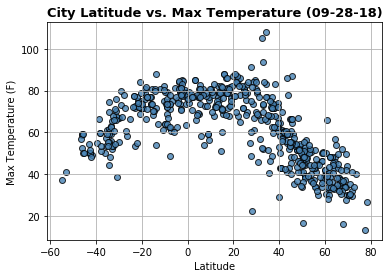

In [20]:
todaysdate = time.strftime("%m-%d-%y")
plt.scatter(city_weather_df['Latitude'], city_weather_df['Temp'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.80)
plt.title("City Latitude vs. Max Temperature (" + todaysdate + ")", fontsize = 13, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#### Latitude vs. Humidity Plot

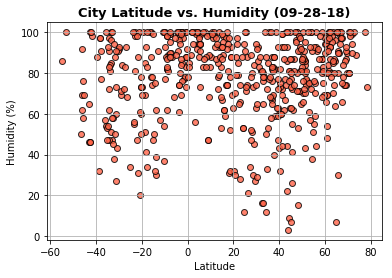

In [21]:
plt.scatter(city_weather_df['Latitude'], city_weather_df['Humidity'], marker="o", facecolors="tomato", edgecolors="black", alpha=0.80)
plt.title("City Latitude vs. Humidity (" + todaysdate + ")", fontsize = 13, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#### Latitude vs. Cloudiness Plot

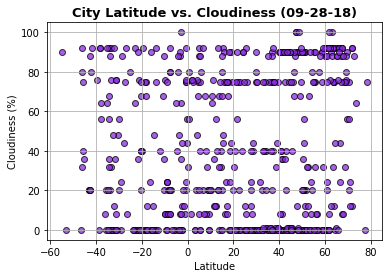

In [22]:
plt.scatter(city_weather_df['Latitude'], city_weather_df['Cloudiness'], marker="o", facecolors="blueviolet", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (" + todaysdate + ")", fontsize = 13, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#### Latitude vs. Wind Speed Plot

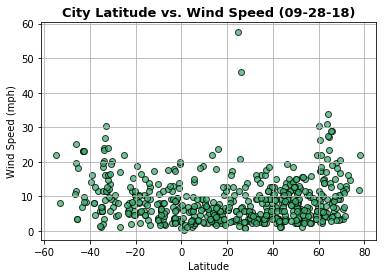

In [23]:
plt.scatter(city_weather_df['Latitude'], city_weather_df['Wind Speed'], marker="o", facecolors="mediumseagreen", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (" + todaysdate + ")", fontsize = 13, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()